Importing the libaries

In [2]:
import pandas as pd
import numpy as np 
import datetime as dt
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Reading the data

In [3]:
data = pd.read_csv('E:\BI\Python for data science\Ecommerce - UK Retailer.csv', encoding='unicode_escape')

Printing the data

In [4]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


Shape of the data

In [5]:
data.shape

(541909, 8)

We can see that Description and CustomerID columns of the dataframe have missing values.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Checking for misssing values

In [7]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Droping the missing values

In [8]:
data.dropna(subset=['CustomerID'], inplace = True)

Checking for null values again

In [9]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

We can see that the Quantitiy colums of the dataframe have negative values.

In [10]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


Records having Quantity less than 0

In [11]:
data[data['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


Storing the index of the rows of the dataframe where Quantity is than 0

In [12]:
i = data[data['Quantity'] < 0].index

Dropping the reccords having Quantity leass than 0

In [13]:
data.drop(i, inplace=True)

We see that there are purchases with  0 unit price. 

In [14]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


There are only 40 records with 0 unit price. We drop these records because it might have been cancelled.

In [15]:
data[data['UnitPrice'] == 0].shape

(40, 8)

Dropping those records

In [16]:
j = data[data['UnitPrice'] == 0].index
data.drop(j, inplace=True)

Shape of the data after cleaning

In [17]:
data.shape

(397884, 8)

Adding a column named amount which is the unit price multiplied by quantity.

In [18]:
data['total_amount']=data['Quantity']*data['UnitPrice']

In [19]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


Check the datatypes of the columns 

In [20]:
data.dtypes

InvoiceNo        object
StockCode        object
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID      float64
Country          object
total_amount    float64
dtype: object

Converting the invoice date column to datetime class.

In [21]:
data['InvoiceDate'] =  pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

Add the columns - Month, Day, weekday and Hour for the invoice

In [22]:
data['month'] = pd.DatetimeIndex(data['InvoiceDate']).month
data['day'] = pd.DatetimeIndex(data['InvoiceDate']).day
data['hour'] = pd.DatetimeIndex(data['InvoiceDate']).hour
data['year'] = data['InvoiceDate'].dt.year
data['weekday'] = data['InvoiceDate'].dt.dayofweek

We have two diffrent years data in our dataset

In [23]:
data.year.value_counts()

2011    371727
2010     26157
Name: year, dtype: int64

Adding a column with year &  month

In [24]:
data['month_year'] = data['InvoiceDate'].dt.to_period('M')
data.month_year = data.month_year.astype('str')
data.month_year = data['month_year'].str.replace('-', '')
data.month_year = data['month_year'].astype('int')

In [25]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount,month,day,hour,year,weekday,month_year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,1,8,2010,2,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,2010,2,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,1,8,2010,2,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,2010,2,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,2010,2,201012


How many orders made by the customers?

In [26]:
data.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().sort_values('InvoiceNo', ascending = True)

,CustomerID,Country,InvoiceNo
0,12346.0,United Kingdom,1
2794,16144.0,United Kingdom,1
1741,14705.0,United Kingdom,1
643,13185.0,United Kingdom,1
2752,16093.0,United Kingdom,1
...,...,...,...
1669,14606.0,United Kingdom,2700
334,12748.0,United Kingdom,4595
1297,14096.0,United Kingdom,5111
1887,14911.0,EIRE,5675


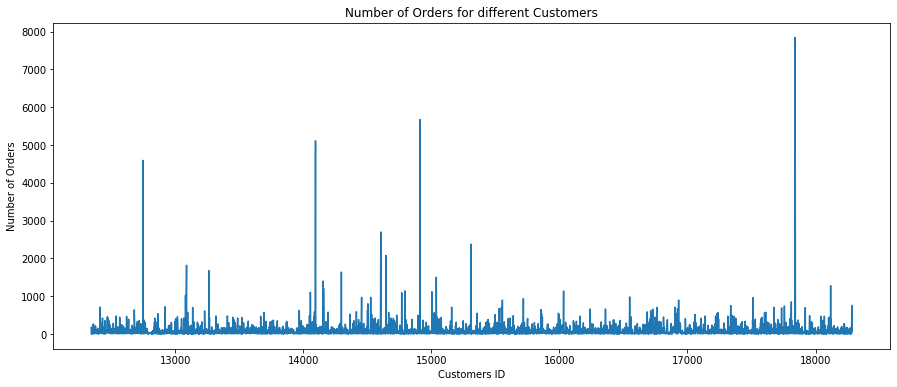

In [27]:
orders = data.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()
plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

TOP 5 customers with higher number of orders

In [28]:
data.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo', ascending=False).head()

,CustomerID,Country,InvoiceNo
4018,17841.0,United Kingdom,7847
1887,14911.0,EIRE,5675
1297,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4595
1669,14606.0,United Kingdom,2700


How much money spent by the customers?

In [29]:
data.groupby(by=['CustomerID','Country'])['total_amount'].sum()

CustomerID  Country       
12346.0     United Kingdom    77183.60
12347.0     Iceland            4310.00
12348.0     Finland            1797.24
12349.0     Italy              1757.55
12350.0     Norway              334.40
                                ...   
18280.0     United Kingdom      180.60
18281.0     United Kingdom       80.82
18282.0     United Kingdom      178.05
18283.0     United Kingdom     2094.88
18287.0     United Kingdom     1837.28
Name: total_amount, Length: 4346, dtype: float64

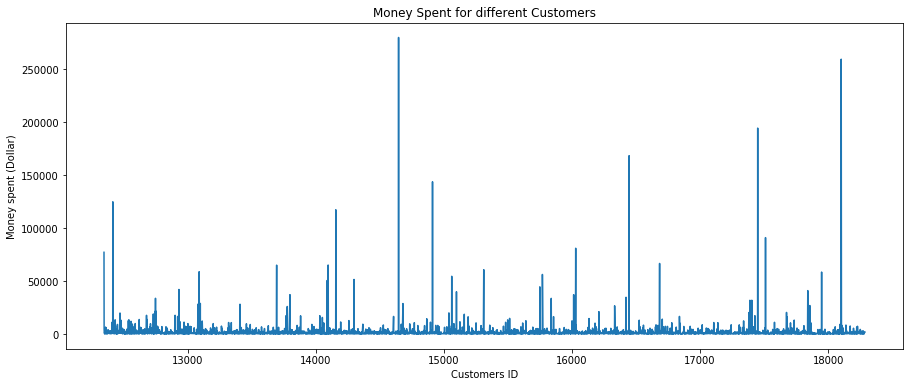

In [30]:
money_spent = data.groupby(by=['CustomerID','Country'],as_index=False)['total_amount'].sum()
plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.total_amount)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

TOP 5 customers with highest money spent

In [31]:
data.groupby(by=['CustomerID','Country'], as_index=False)['total_amount'].sum().sort_values(by='total_amount', ascending=False).head()

,CustomerID,Country,total_amount
1697,14646.0,Netherlands,280206.02
4209,18102.0,United Kingdom,259657.30
3736,17450.0,United Kingdom,194550.79
3016,16446.0,United Kingdom,168472.50
1887,14911.0,EIRE,143825.06


How many orders per month?

In [33]:
data.groupby('InvoiceNo')['month_year'].unique().value_counts().sort_index()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[201012]    1400
[201101]     987
[201102]     997
[201103]    1321
[201104]    1149
[201105]    1555
[201106]    1393
[201107]    1331
[201108]    1280
[201109]    1755
[201110]    1929
[201111]    2657
[201112]     778
Name: month_year, dtype: int64

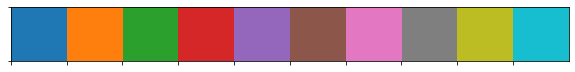

In [34]:
sns.palplot(color)

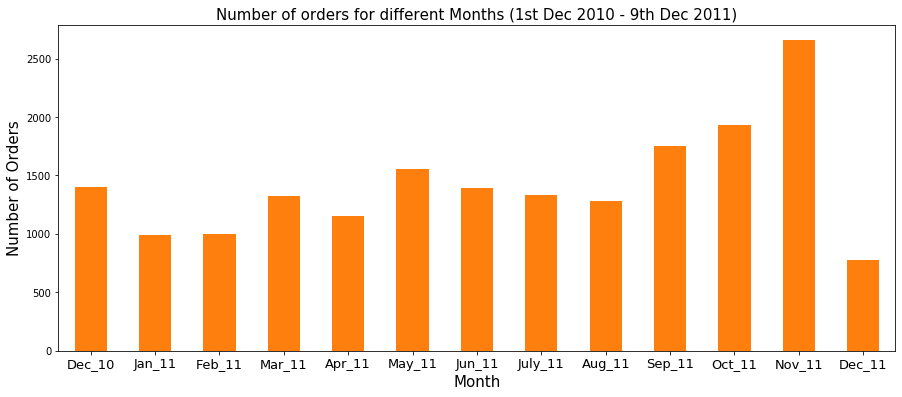

In [35]:
ax = data.groupby('InvoiceNo')['month_year'].unique().value_counts().sort_index().plot(kind='bar',color=color[1],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

How many orders per day?

In [54]:
data.groupby('InvoiceNo')['weekday'].unique().value_counts().sort_index()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[6]    2169
[4]    2829
[3]    4032
[2]    3455
[1]    3184
[0]    2863
Name: weekday, dtype: int64

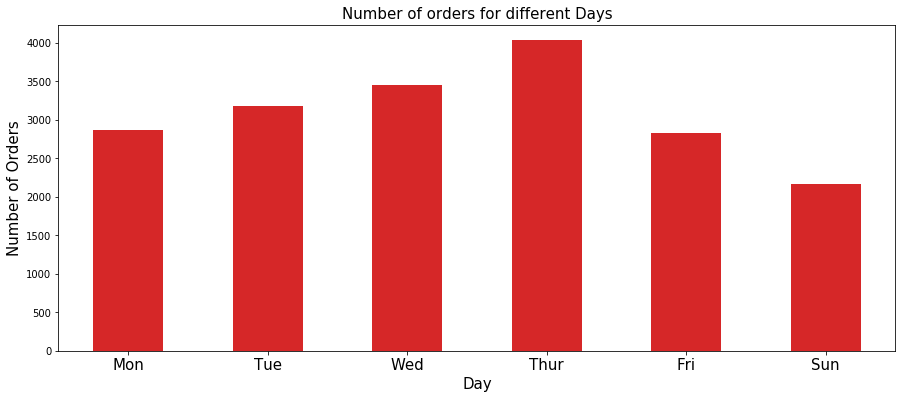

In [37]:
ax = data.groupby('InvoiceNo')['weekday'].unique().value_counts().sort_index().plot(kind='bar',color=color[3],figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

How many orders per hour?

In [38]:
data.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-1].sort_index()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[6]        1
[7]       29
[8]      555
[9]     1393
[10]    2226
[11]    2276
[12]    3129
[13]    2636
[14]    2274
[15]    2037
[16]    1100
[17]     544
[18]     169
[19]     144
[20]      18
Name: hour, dtype: int64

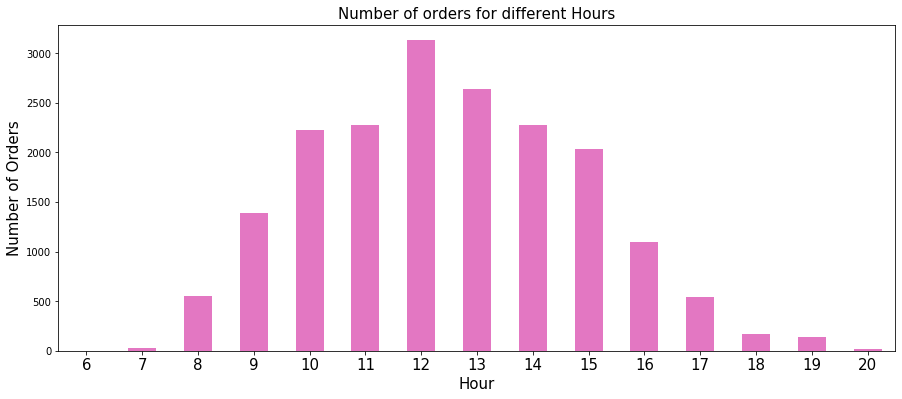

In [39]:
ax = data.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',color=color[6],figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

How many orders for each country?

In [40]:
data.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False)

Country
United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


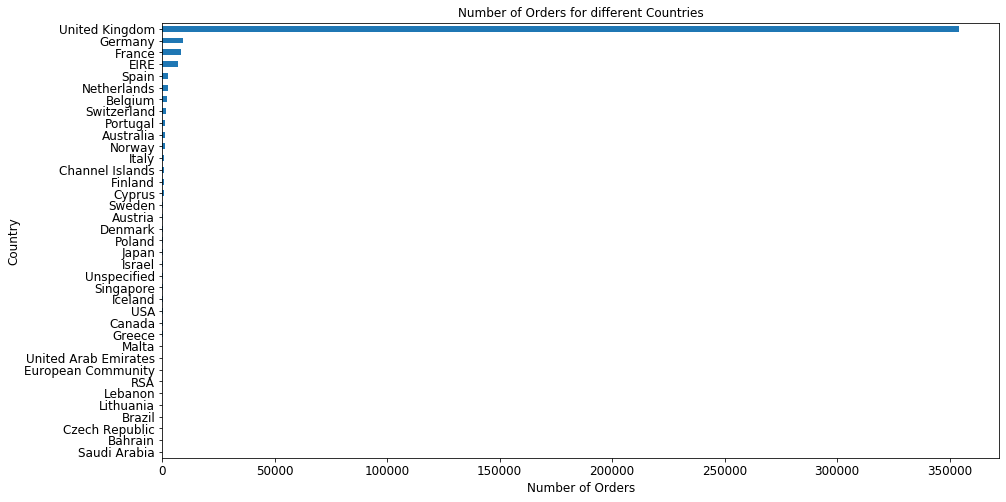

In [41]:
df3 = data.groupby('Country')['InvoiceNo'].count().sort_values(ascending=True)
plt.subplots(figsize=(15,8))
df3.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

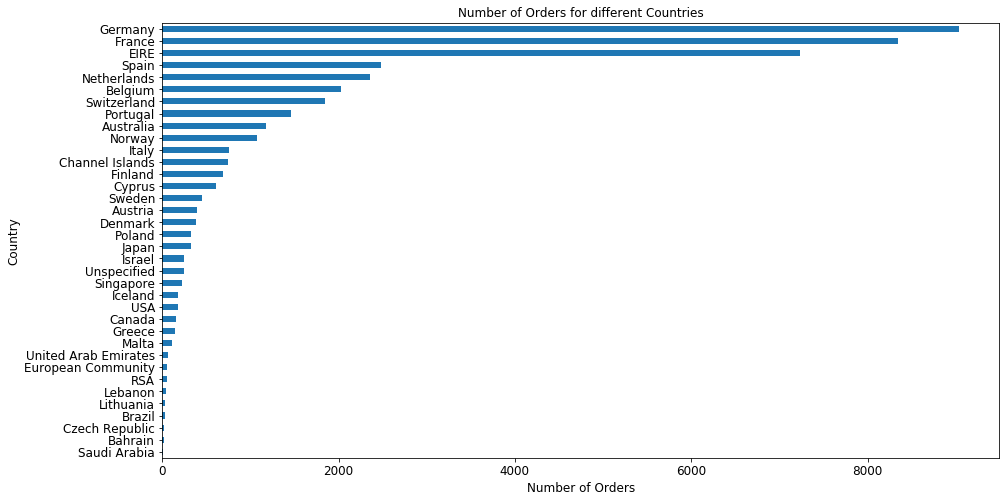

In [42]:
df3 = data.groupby('Country')['InvoiceNo'].count().sort_values(ascending=True)
del df3['United Kingdom']
plt.subplots(figsize=(15,8))
df3.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

Orders trend across months

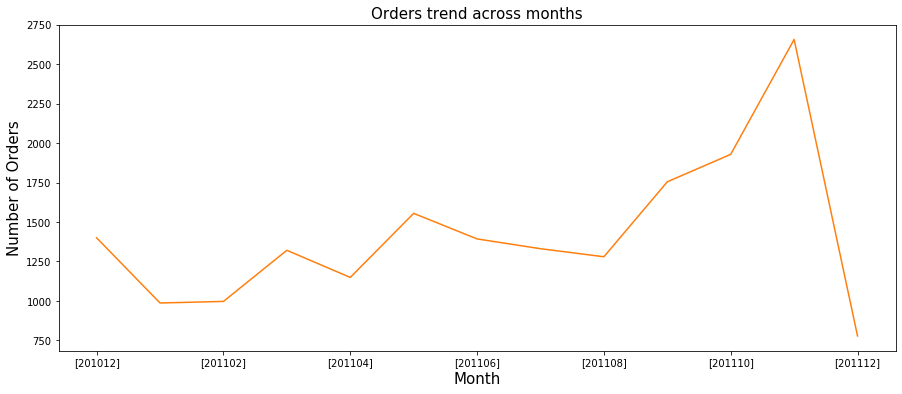

In [43]:
ax = data.groupby('InvoiceNo')['month_year'].unique().value_counts().sort_index().plot(kind='line',color=color[1],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Orders trend across months',fontsize=15)
plt.show()

How much money spent by each country?

In [44]:
data.groupby('Country')['total_amount'].sum().sort_values(ascending=False)

Country
United Kingdom          7.308392e+06
Netherlands             2.854463e+05
EIRE                    2.655459e+05
Germany                 2.288671e+05
France                  2.090240e+05
Australia               1.385213e+05
Spain                   6.157711e+04
Switzerland             5.644395e+04
Belgium                 4.119634e+04
Sweden                  3.837833e+04
Japan                   3.741637e+04
Norway                  3.616544e+04
Portugal                3.343989e+04
Finland                 2.254608e+04
Singapore               2.127929e+04
Channel Islands         2.045044e+04
Denmark                 1.895534e+04
Italy                   1.748324e+04
Cyprus                  1.359038e+04
Austria                 1.019868e+04
Poland                  7.334650e+03
Israel                  7.221690e+03
Greece                  4.760520e+03
Iceland                 4.310000e+03
Canada                  3.666380e+03
USA                     3.580390e+03
Malta                   2.7255

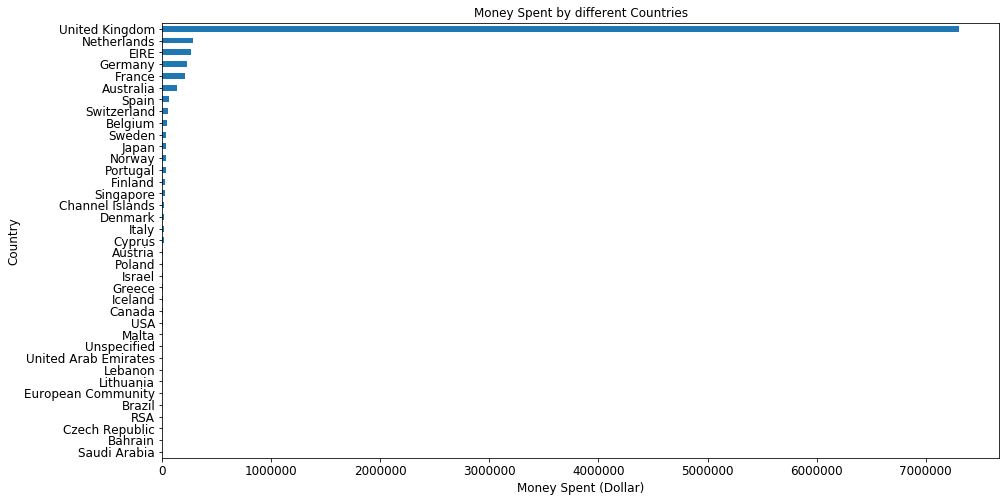

In [45]:
df3 = data.groupby('Country')['total_amount'].sum().sort_values(ascending=True)
plt.subplots(figsize=(15,8))
df3.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

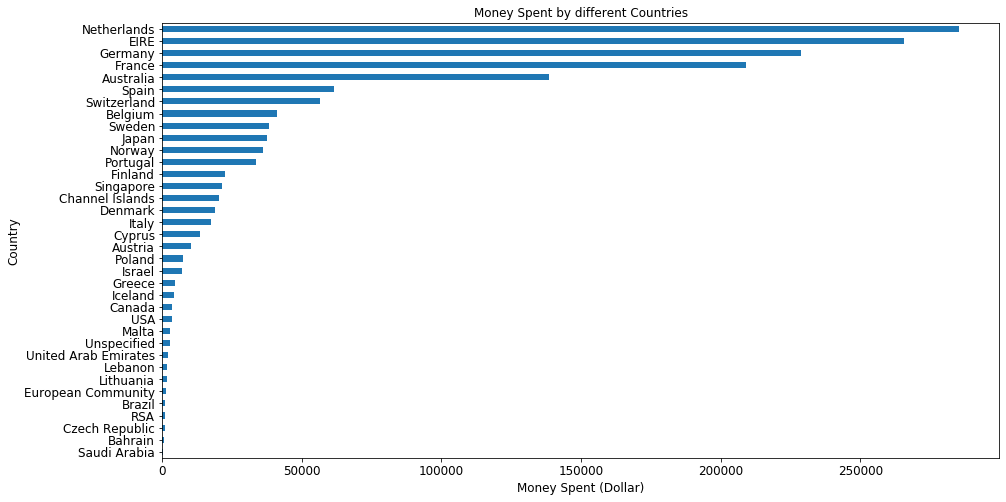

In [46]:
df3 = data.groupby('Country')['total_amount'].sum().sort_values(ascending=True)
del df3['United Kingdom']
plt.subplots(figsize=(15,8))
df3.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

We can inference that there is high number of outliers in or data.

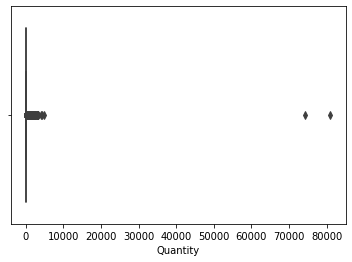

In [47]:
sns.boxplot(data['Quantity'])

To visvualize this plot in a significant way

We see that there are only 11609 records among 397924 where the Quantity value is greater  than 50.

In [48]:
data[data['Quantity']>50]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount,month,day,hour,year,weekday,month_year
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748.0,United Kingdom,204.00,12,1,9,2010,2,201012
83,536376,21733,RED HANGING HEART T-LIGHT HOLDER,64,2010-12-01 09:32:00,2.55,15291.0,United Kingdom,163.20,12,1,9,2010,2,201012
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688.0,United Kingdom,50.40,12,1,9,2010,2,201012
102,536378,85071B,RED CHARLIE+LOLA PERSONAL DOORSIGN,96,2010-12-01 09:37:00,0.38,14688.0,United Kingdom,36.48,12,1,9,2010,2,201012
176,536386,85099C,JUMBO BAG BAROQUE BLACK WHITE,100,2010-12-01 09:57:00,1.65,16029.0,United Kingdom,165.00,12,1,9,2010,2,201012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541702,581566,23404,HOME SWEET HOME BLACKBOARD,144,2011-12-09 11:50:00,3.26,18102.0,United Kingdom,469.44,12,9,11,2011,4,201112
541703,581567,21417,COCKLE SHELL DISH,84,2011-12-09 11:56:00,0.79,16626.0,United Kingdom,66.36,12,9,11,2011,4,201112
541711,581567,21326,AGED GLASS SILVER T-LIGHT HOLDER,144,2011-12-09 11:56:00,0.55,16626.0,United Kingdom,79.20,12,9,11,2011,4,201112
541746,581571,23167,SMALL CERAMIC TOP STORAGE JAR,96,2011-12-09 12:00:00,0.69,15311.0,United Kingdom,66.24,12,9,12,2011,4,201112


When we check for the quantity values less than 50 we see that the median of the column is around 4 and the 5th precentile and 95 percentile of the column which suggests that maximum number of orders were in between 1 and 12.

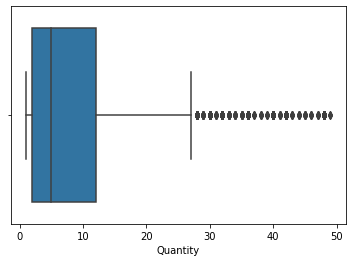

In [49]:
df2 = data[data['Quantity']< 50]
sns.boxplot(df2['Quantity'])

Percentage of data where the quatity value is greater than 50

In [50]:
df1 = data[data['Quantity'] > 50]
perc = (df1.shape[0])/(data.shape[0]) * 100
print(perc)

2.915673915010405


We see that the that there are a huge number of outliers in the UnitPrice column and some have excessively high  value.

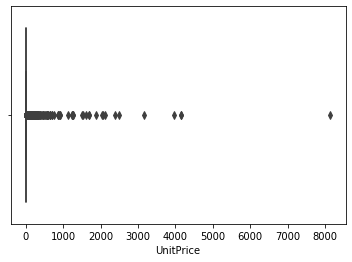

In [51]:
sns.boxplot(data['UnitPrice'])

Limiting the data to include orders below 10$ only

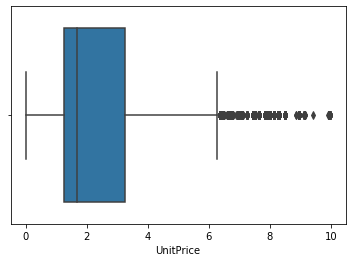

In [52]:
df1 = data[data['UnitPrice'] < 10]
sns.boxplot(df1['UnitPrice'])